# 🧬 DNA → RNA → Protein Translator
This notebook allows users to input a DNA sequence and convert it into:
- mRNA (transcription)
- Amino acid sequence (translation)

🔧 Built with Python, this project demonstrates the core steps of gene expression in silico.


## 📥 Step 1: Enter DNA Sequence
Paste your DNA sequence using 1-letter nucleotide codes (A, T, G, C).


In [ ]:
# Example DNA sequence (replace with your own)
dna_seq = "ATGGCCATTGTAATGGGCCAAAAGCTGGGTGCCCGATAG"
dna_seq = dna_seq.upper().replace(" ", "").replace("\n", "")

# Basic validation
valid_bases = set("ATGC")
if not set(dna_seq).issubset(valid_bases):
    raise ValueError("Invalid DNA sequence: only A, T, G, C are allowed.")


## 🔁 Step 2: Transcribe DNA to mRNA
Replace every Thymine (T) with Uracil (U).


In [ ]:
rna_seq = dna_seq.replace("T", "U")
print("🧬 mRNA Sequence:\n", rna_seq)


🧬 mRNA Sequence:
 AUGGCCAUUGUAAUGGGCCAAAAGCUGGGUGCCCGAUAG


## 🔄 Step 3: Translate mRNA to Protein
Using the standard genetic code, convert every codon (3 bases) to its amino acid.


In [ ]:
codon_table = {
    # Start codon
    'AUG':'M',
    # Amino acids
    'UUU':'F', 'UUC':'F', 'UUA':'L', 'UUG':'L',
    'UCU':'S', 'UCC':'S', 'UCA':'S', 'UCG':'S',
    'UAU':'Y', 'UAC':'Y', 'UGU':'C', 'UGC':'C',
    'UUA':'L', 'UUG':'L', 'CUU':'L', 'CUC':'L', 'CUA':'L', 'CUG':'L',
    'CCU':'P', 'CCC':'P', 'CCA':'P', 'CCG':'P',
    'CAU':'H', 'CAC':'H', 'CAA':'Q', 'CAG':'Q',
    'CGU':'R', 'CGC':'R', 'CGA':'R', 'CGG':'R',
    'AUU':'I', 'AUC':'I', 'AUA':'I',
    'ACU':'T', 'ACC':'T', 'ACA':'T', 'ACG':'T',
    'AAU':'N', 'AAC':'N', 'AAA':'K', 'AAG':'K',
    'AGU':'S', 'AGC':'S', 'AGA':'R', 'AGG':'R',
    'GUU':'V', 'GUC':'V', 'GUA':'V', 'GUG':'V',
    'GCU':'A', 'GCC':'A', 'GCA':'A', 'GCG':'A',
    'GAU':'D', 'GAC':'D', 'GAA':'E', 'GAG':'E',
    'GGU':'G', 'GGC':'G', 'GGA':'G', 'GGG':'G',
    # Stop codons
    'UAA':'*', 'UAG':'*', 'UGA':'*'
}

protein = ""
for i in range(0, len(rna_seq), 3):
    codon = rna_seq[i:i+3]
    if len(codon) == 3:
        aa = codon_table.get(codon, '-')
        protein += aa

print("🧪 Protein Sequence:\n", protein)


🧪 Protein Sequence:
 MAIVMGQKLGAR*


## 📚 Codon Table Reference


In [ ]:
import pandas as pd

# Convert codon table to DataFrame
df = pd.DataFrame(list(codon_table.items()), columns=["Codon", "Amino Acid"])
df = df.sort_values(by="Codon").reset_index(drop=True)
df.head(10)  # Show top 10


,Codon,Amino Acid
0,AAA,K
1,AAC,N
2,AAG,K
3,AAU,N
4,ACA,T
5,ACC,T
6,ACG,T
7,ACU,T
8,AGA,R
9,AGC,S


## 📊 Codon Usage Visualization (Optional)
See how often each codon appears in your sequence.


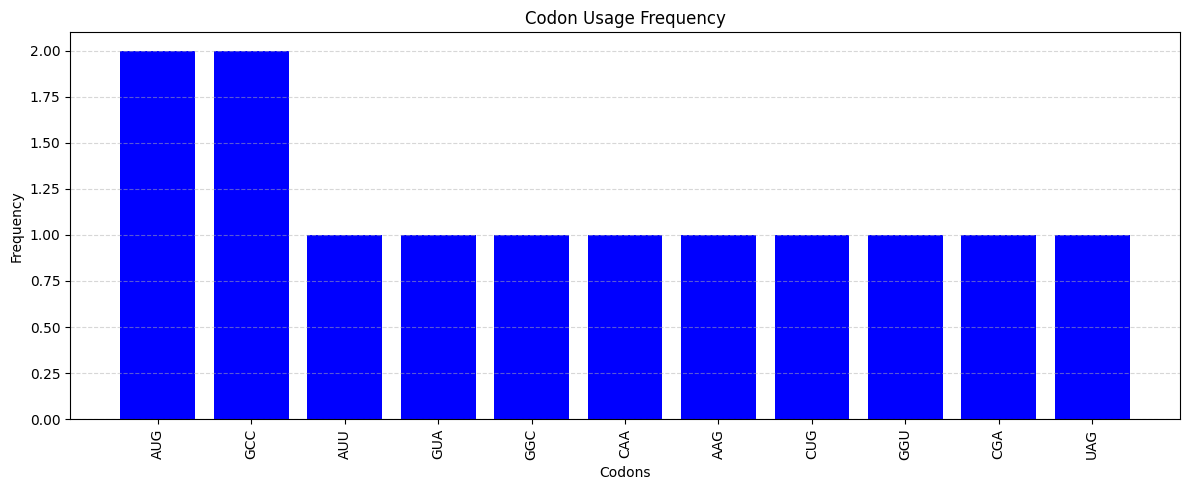

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

codons = [rna_seq[i:i+3] for i in range(0, len(rna_seq)-2, 3)]
counts = Counter(codons)

plt.figure(figsize=(12, 5))
plt.bar(counts.keys(), counts.values(), color='blue')
plt.title("Codon Usage Frequency")
plt.xlabel("Codons")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ✅ Conclusion
This tool converts DNA sequences into mRNA and protein using the genetic code.  
It validates inputs, performs base substitution, handles codon mapping, and even visualizes codon usage.

---

